In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
n_bins = 12

In [4]:
# function that creates a heatmap with two gaussian distributions
# the first one is centered at (-1, -1) and the second one is centered at (1, 1)

def create_heatmap():
    # create a grid of points
    x = np.linspace(-2, 2, 100)
    y = np.linspace(-2, 2, 100)
    X, Y = np.meshgrid(x, y)

    # create two gaussian distributions
    Z1 = np.exp(-((X+1)**2 + (Y+1)**2)*2)
    Z2 = np.exp(-((X-1)**2 + (Y-1)**2)*2)

    # create a heatmapm that will be returned as plot
    Z = Z1 + Z2
    
    return Z

In [29]:
# plot a heatmap with two gaussian distributions centered at (-1, -1) and (1, 1)
# add a red dot at the center of each gaussian distribution

def plot_heatmap(Z, list_of_points, ax):
    # plot the heatmap with a colorbar
    
    ax.imshow(Z, cmap='viridis', interpolation='nearest', extent=[-2, 2, -2, 2])
    # x labels
    ax.set_xlabel(r'$\theta_1$')
    # y labels
    ax.set_ylabel(r'$\theta_2$')
    
    # plot a red dot for each point in the list of points
    # add line between points
    for i in range(len(list_of_points)):
        ax.plot(list_of_points[i][0], list_of_points[i][1], 'ro')
        #plt.plot(list_of_points[i][0], list_of_points[i][1], 'ro')
        if i > 0:
            # add arrow between points in red on top of points
            ax.arrow(list_of_points[i-1][0], list_of_points[i-1][1], list_of_points[i][0]-list_of_points[i-1][0], list_of_points[i][1]-list_of_points[i-1][1], color='red', width=0.01, length_includes_head=True)
            #plt.arrow(list_of_points[i-1][0], list_of_points[i-1][1], list_of_points[i][0]-list_of_points[i-1][0], list_of_points[i][1]-list_of_points[i-1][1], color='red', width=0.01, length_includes_head=True)
    
    #plt.savefig('benchmark_heatmap_step_' + str(i) + '.png', dpi = 300) 

    #plt.show()

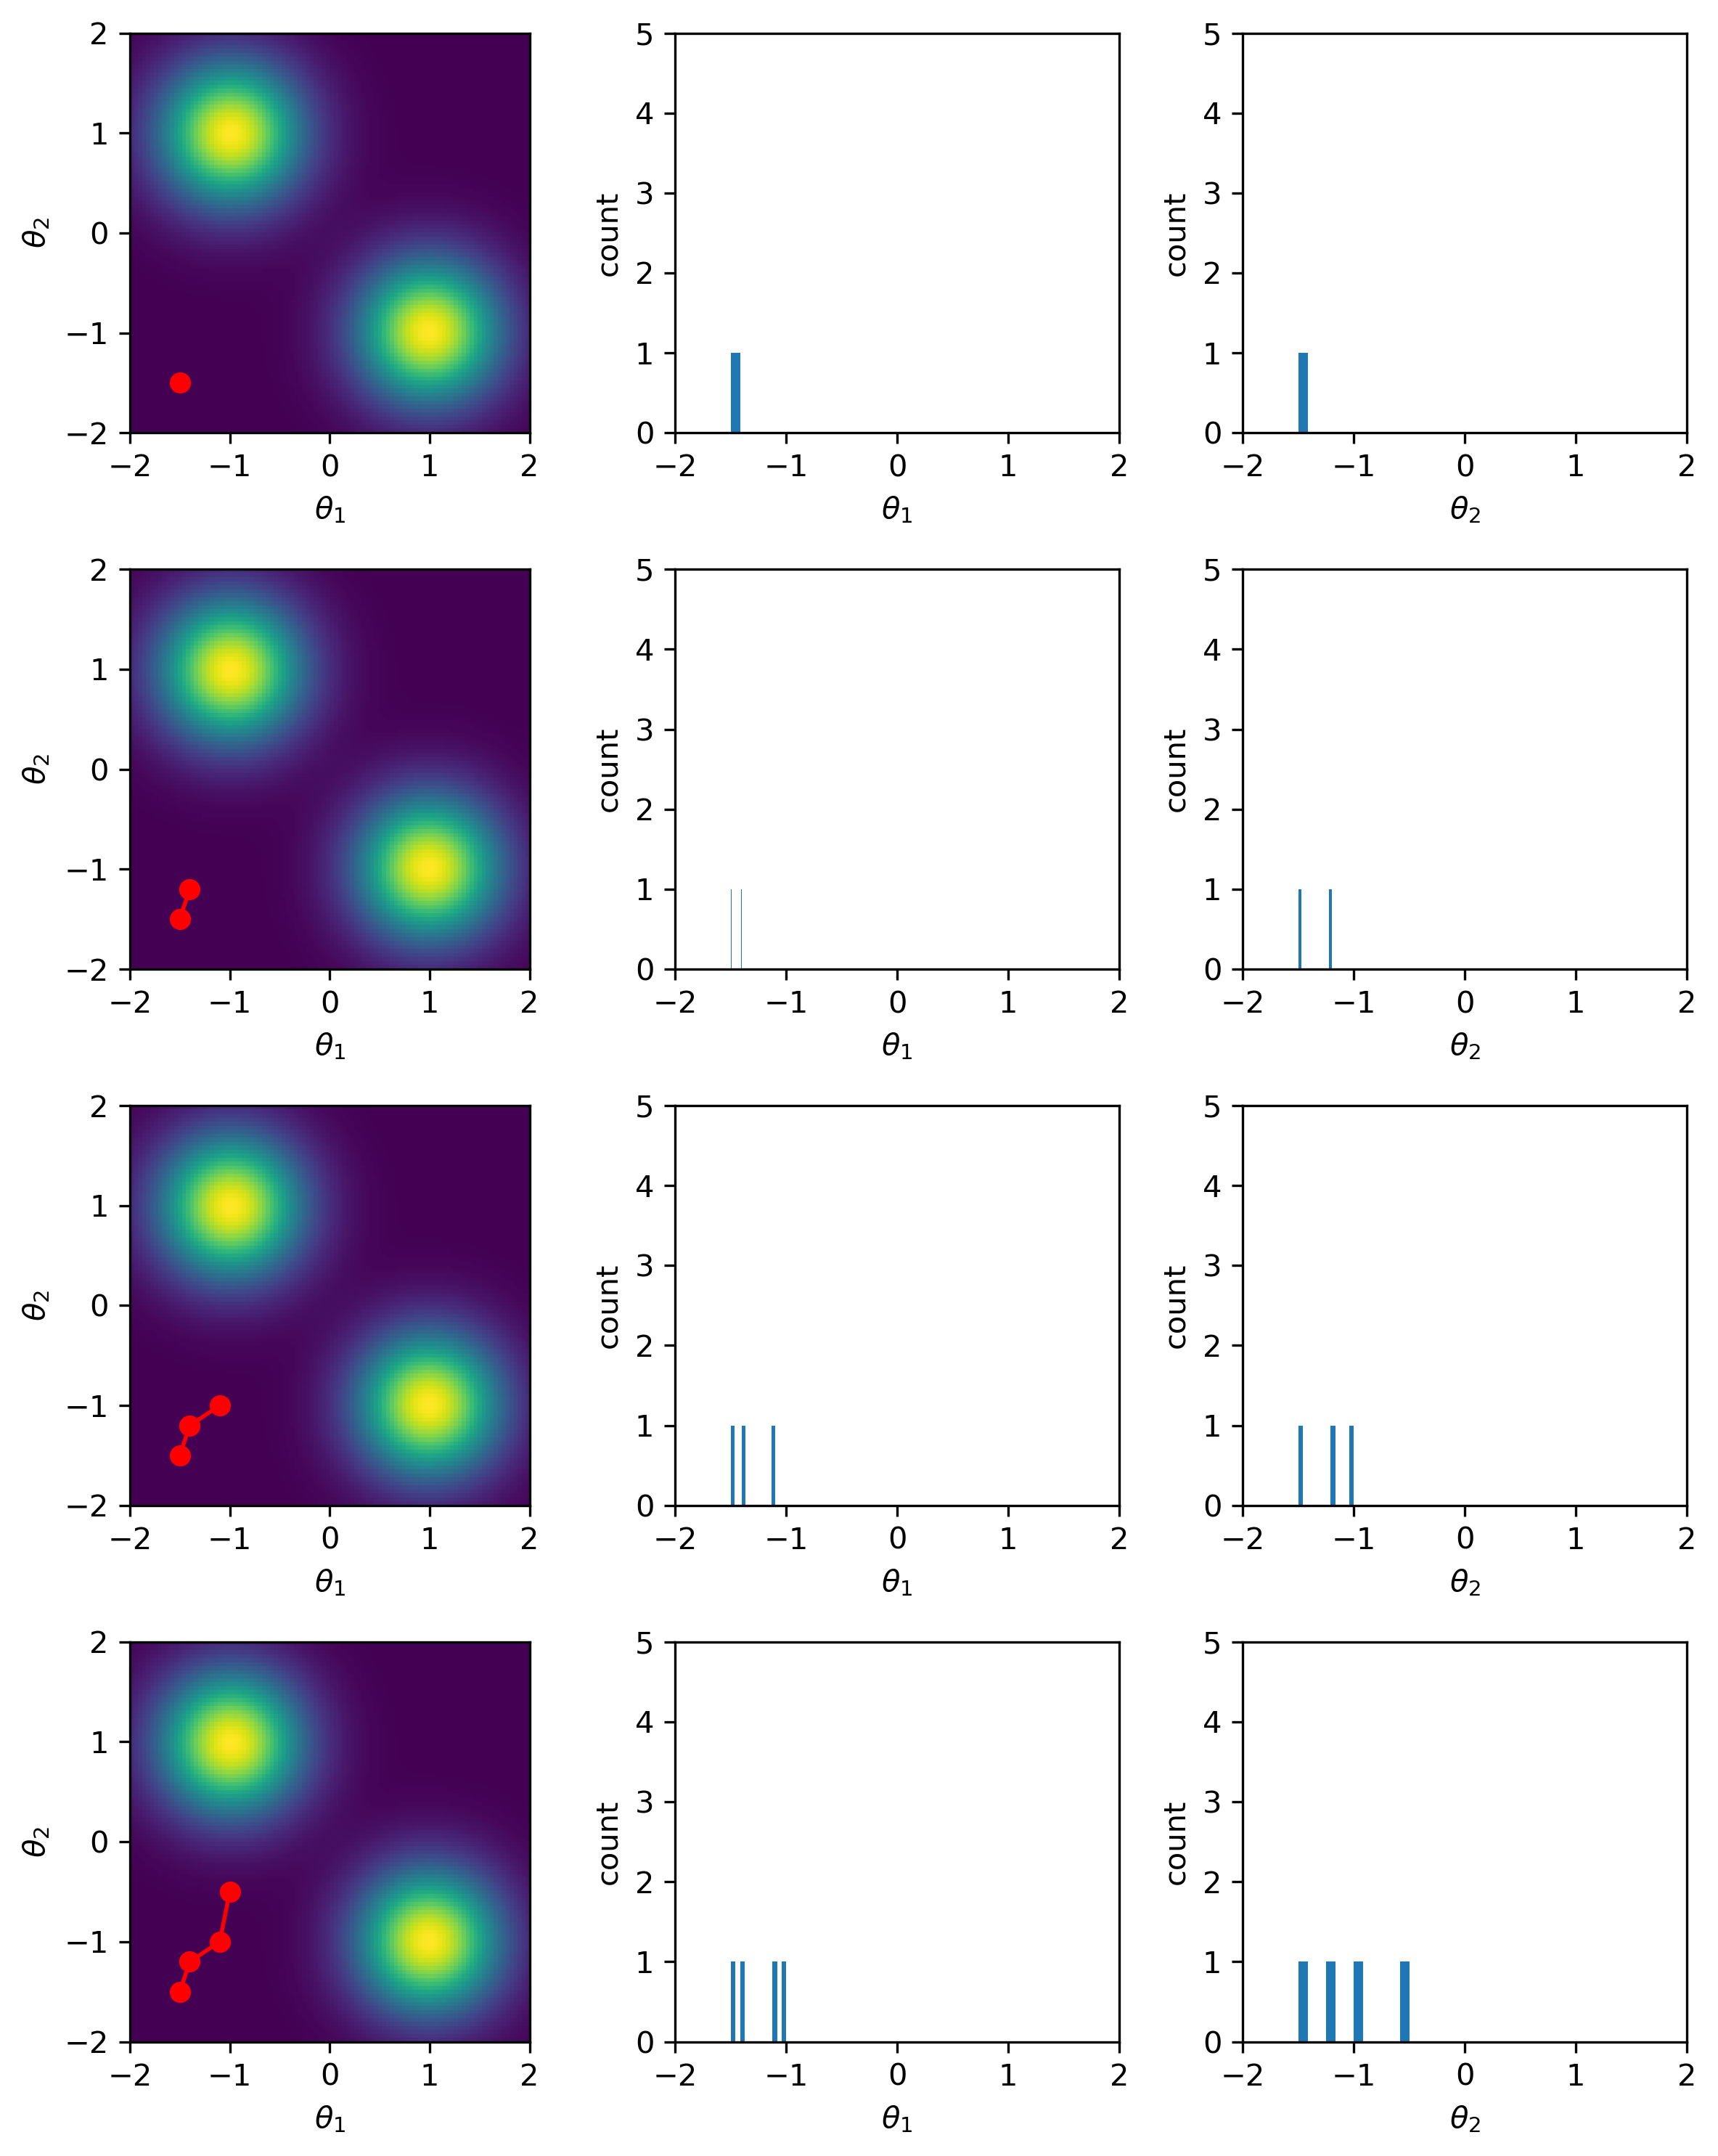

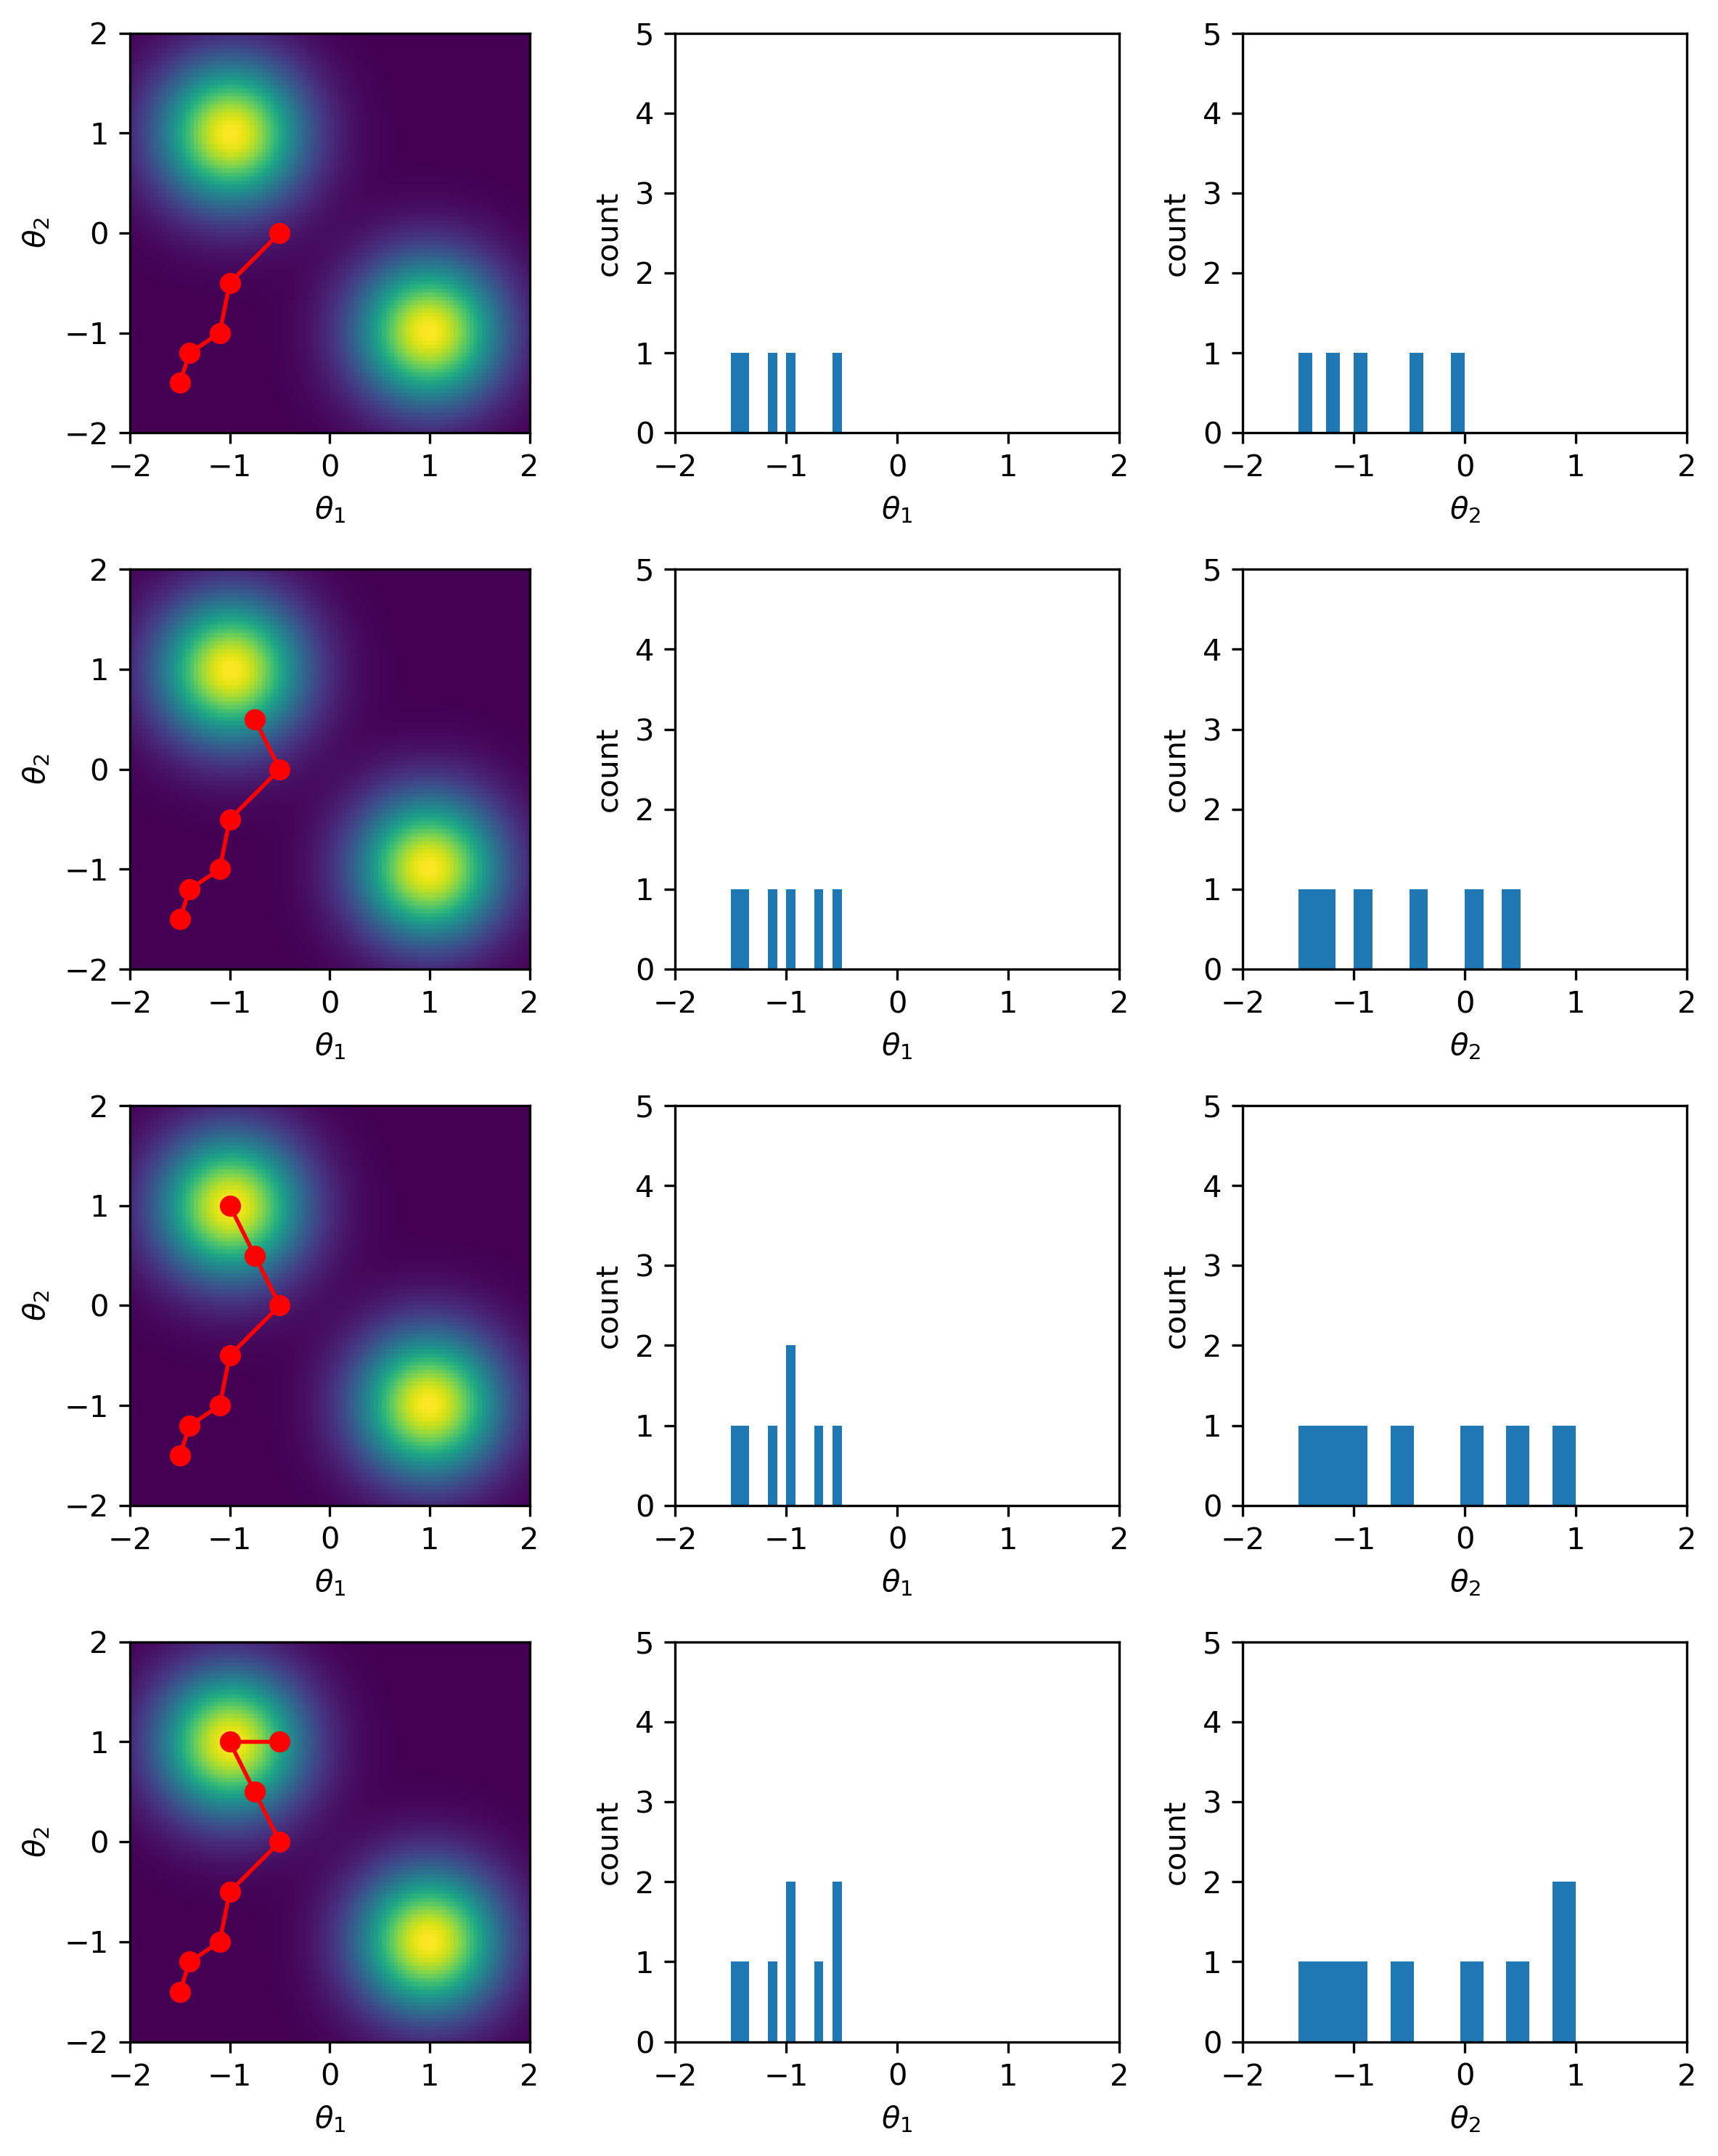

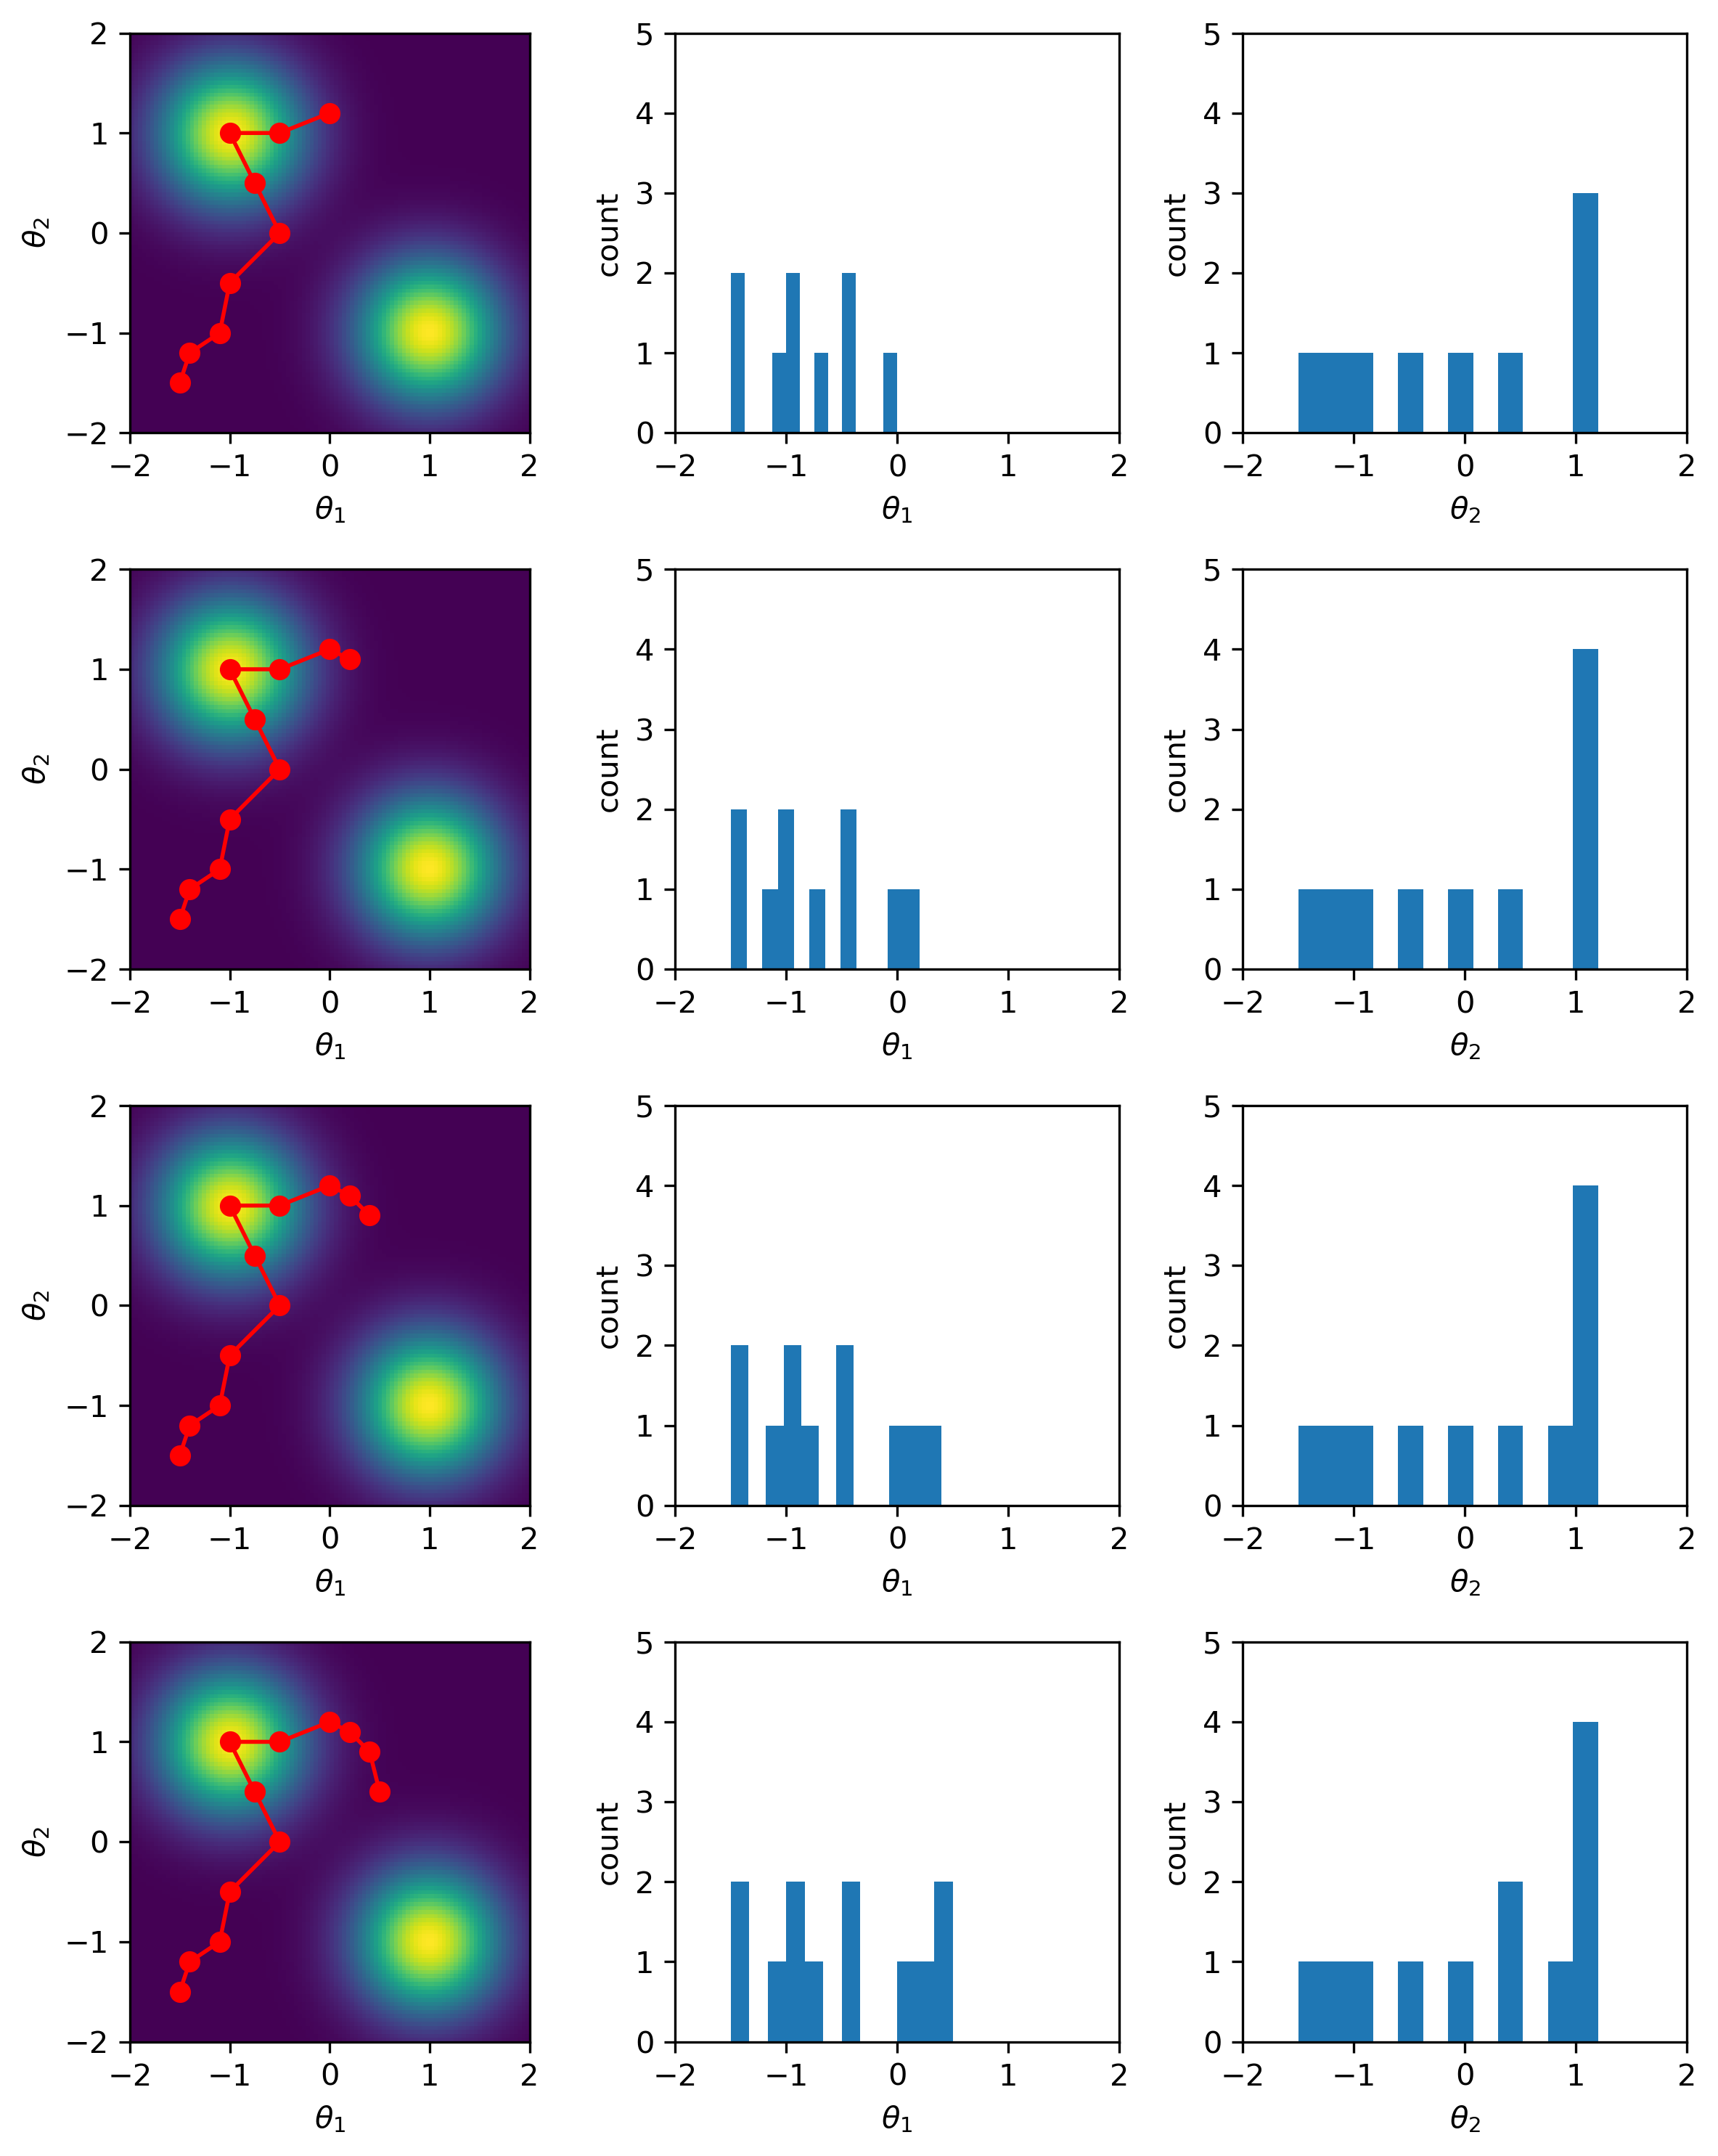

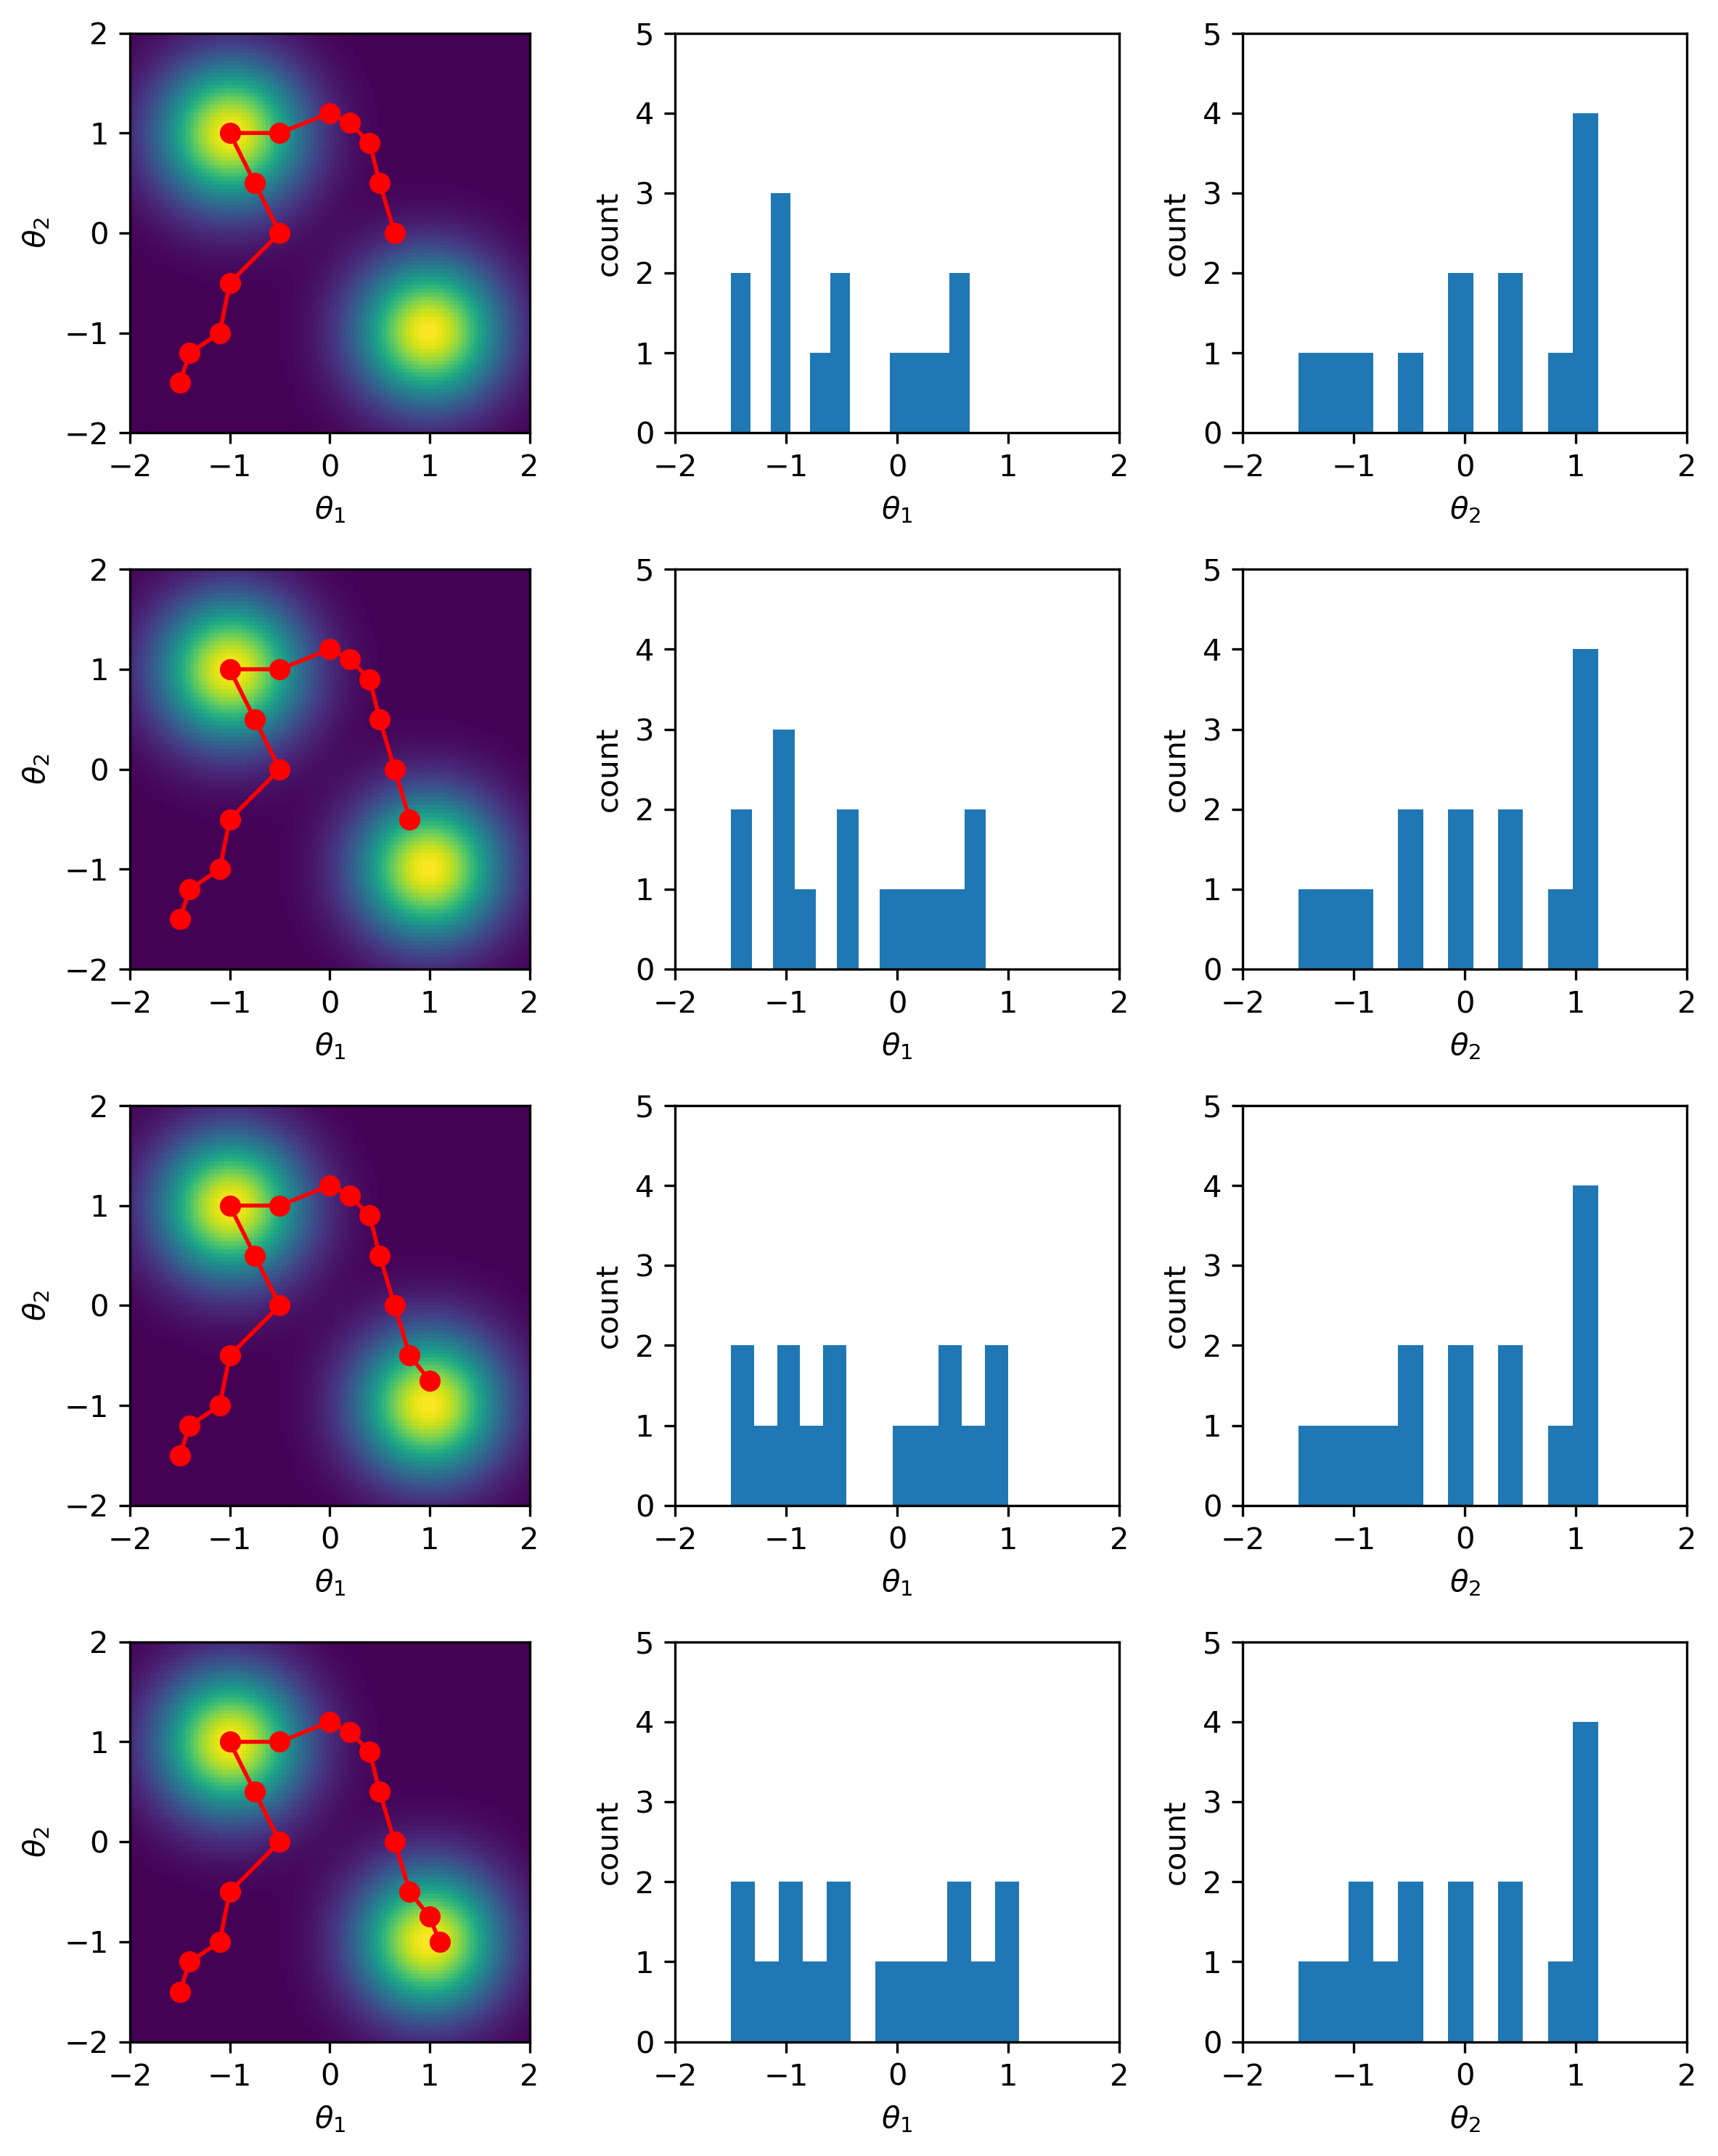

In [36]:
list_of_points = [(-1.5, -1.5),     # 1
                  (-1.4, -1.2),     # 2
                  (-1.1, -1.0),     # 3
                  (-1, -0.5),       # 4
                  (-0.5, 0),        # 5
                  (-0.75, 0.5),     # 6
                  (-1, 1),          # 7
                  (-0.5, 1),        # 8
                  (0, 1.2),         # 9
                  (0.2, 1.1),       # 10
                  (0.4, 0.9),       # 11
                  (0.5, 0.5),       # 12
                  (0.65, 0),        # 13
                  (0.8, -0.5),      # 14
                  (1.0, -0.75),     # 15
                  (1.1, -1.0)       # 16
                  ]

plot_counter = 0
# plot points one by one, add a histogram as second plot
for i in range(0,len(list_of_points),4):
    
    # place 8 plots in a 4x2 grid
    fig, ax = plt.subplots(4, 3, figsize=(8, 10))
    
    for j in range(4):
    
        plot_heatmap(create_heatmap(), list_of_points[:j+i+1], ax[j][0])
        
        # plot a two histograms for both parameters
        # adjust the size of the figure        
        #plt.figure(figsize=(8, 5))
        #plt.subplot(1, 2, 1)
        ax[j,1].hist([point[0] for point in list_of_points[:j+i+1]], bins=n_bins)
        # rename x and y labels
        ax[j,1].set_xlabel(r'$\theta_1$')
        ax[j,1].set_ylabel('count')
        ax[j,1].set_xlim(-2, 2)
        ax[j,1].set_ylim(0, 5)
        
        ax[j,2].hist([point[1] for point in list_of_points[:j+i+1]], bins=n_bins)
        # rename x and y labels
        ax[j,2].set_xlabel(r'$\theta_2$')
        ax[j,2].set_ylabel('count')
        ax[j,2].set_xlim(-2, 2)
        ax[j,2].set_ylim(0, 5)
    
    # supertitle for the whole figure, place it above the subplots
    i_4 = i + 4
    #fig.suptitle(f'Benchmark step {i} to {i_4}', 
    #             fontsize=16)
    
    # avoid overlapping of subplots with supertitle and between subplots
    plt.tight_layout()
    
    # use tight layout
    fig.savefig('benchmark_hist_step_' + str(i) + '.eps', dpi = 300, format='eps')
    
    plt.show()
    
    
    


In [32]:
def plot_heatmap_2(Z, list_of_points_h1, list_of_points_h2, ax):
    # plot the heatmap with a colorbar
    
    ax.imshow(Z, cmap='viridis', interpolation='nearest', extent=[-2, 2, -2, 2])
    # x labels
    ax.set_xlabel(r'$\theta_1$')
    # y labels
    ax.set_ylabel(r'$\theta_2$')
    
    # add a square 
    ax.plot([-1.9, -0.1], [1.9, 1.9], 'r-')
    ax.plot([-1.9, -0.1], [0.1, 0.1], 'r-')
    ax.plot([-1.9, -1.9], [1.9, 0.1], 'r-')
    ax.plot([-0.1, -0.1], [1.9, 0.1], 'r-')
    
    # add a square around the second gaussian distribution
    ax.plot([0.1, 1.9], [-1.9, -1.9], 'r-')
    ax.plot([0.1, 1.9], [-0.1, -0.1], 'r-')
    ax.plot([0.1, 0.1], [-1.9, -0.1], 'r-')
    ax.plot([1.9, 1.9], [-1.9, -0.1], 'r-')
    
    # plot a red dot for each point in the list of points
    # add line between points
    for i in range(len(list_of_points_h1)):
        ax.plot(list_of_points_h1[i][0], list_of_points_h1[i][1], 'ro')
        if i > 0:
            # add arrow between points in red on top of points
            ax.arrow(list_of_points_h1[i-1][0], list_of_points_h1[i-1][1], list_of_points_h1[i][0]-list_of_points_h1[i-1][0], list_of_points_h1[i][1]-list_of_points_h1[i-1][1], color='red', width=0.01, length_includes_head=True)
            
    for i in range(len(list_of_points_h2)):
        ax.plot(list_of_points_h2[i][0], list_of_points_h2[i][1], 'ro')
        if i > 0:
            # add arrow between points in blue on top of points
            ax.arrow(list_of_points_h2[i-1][0], list_of_points_h2[i-1][1], list_of_points_h2[i][0]-list_of_points_h2[i-1][0], list_of_points_h2[i][1]-list_of_points_h2[i-1][1], color='red', width=0.01, length_includes_head=True)
            
    #plt.savefig('algo_heatmap_step_' + str(i) + '.png', dpi = 300) 

    #plt.show()

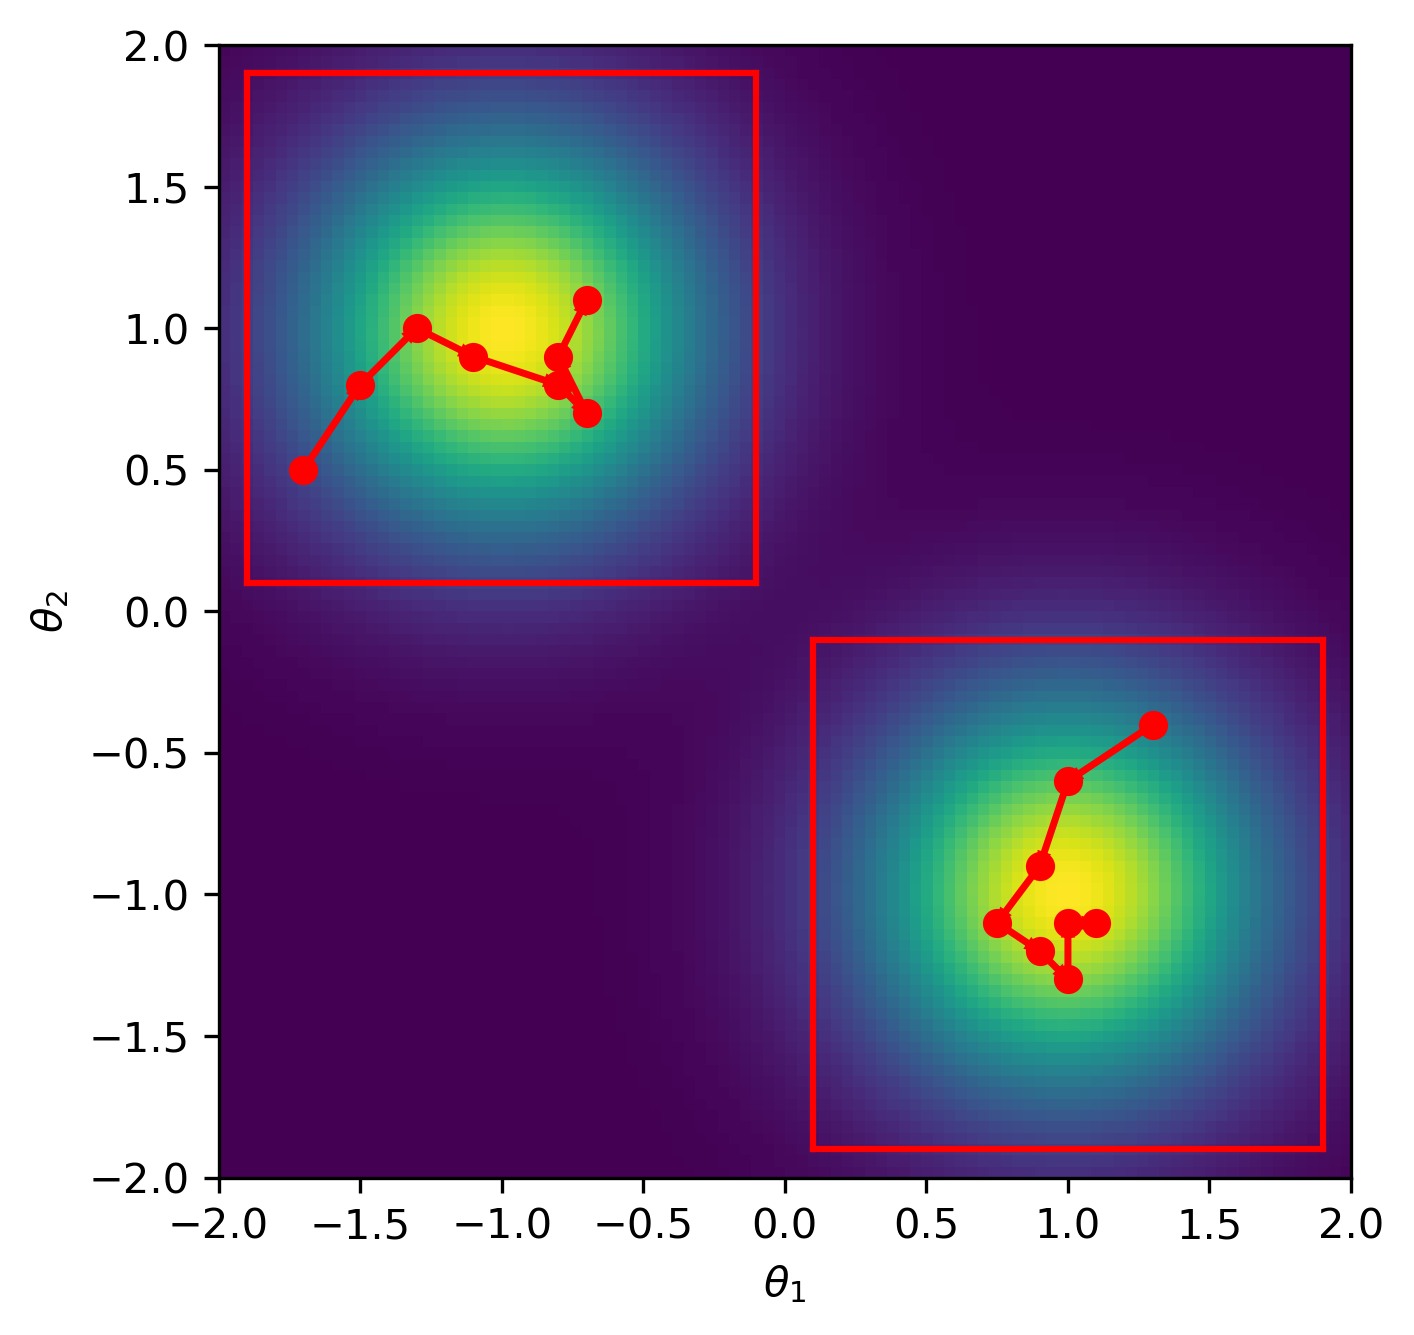

In [34]:
list_of_points_h1 = [(-1.7, 0.5),   # 1
                     (-1.5, 0.8),   # 2
                     (-1.3, 1.0),   # 3
                     (-1.1, 0.9),   # 4
                     (-0.8, 0.8),   # 5
                     (-0.7, 0.7),   # 6
                     (-0.8, 0.9),   # 7
                     (-0.7, 1.1)    # 8
                     ]

list_of_points_h2 = [(1.3, -0.4),   # 1
                     (1, -0.6),     # 2
                     (0.9, -0.9),   # 3
                     (0.75, -1.1),  # 4
                     (0.9, -1.2),   # 5
                     (1.0, -1.3),   # 6
                     (1.0, -1.1),   # 7
                     (1.1, -1.1)    # 8)
                     ]    
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plot_heatmap_2(create_heatmap(), list_of_points_h1, list_of_points_h2, ax)

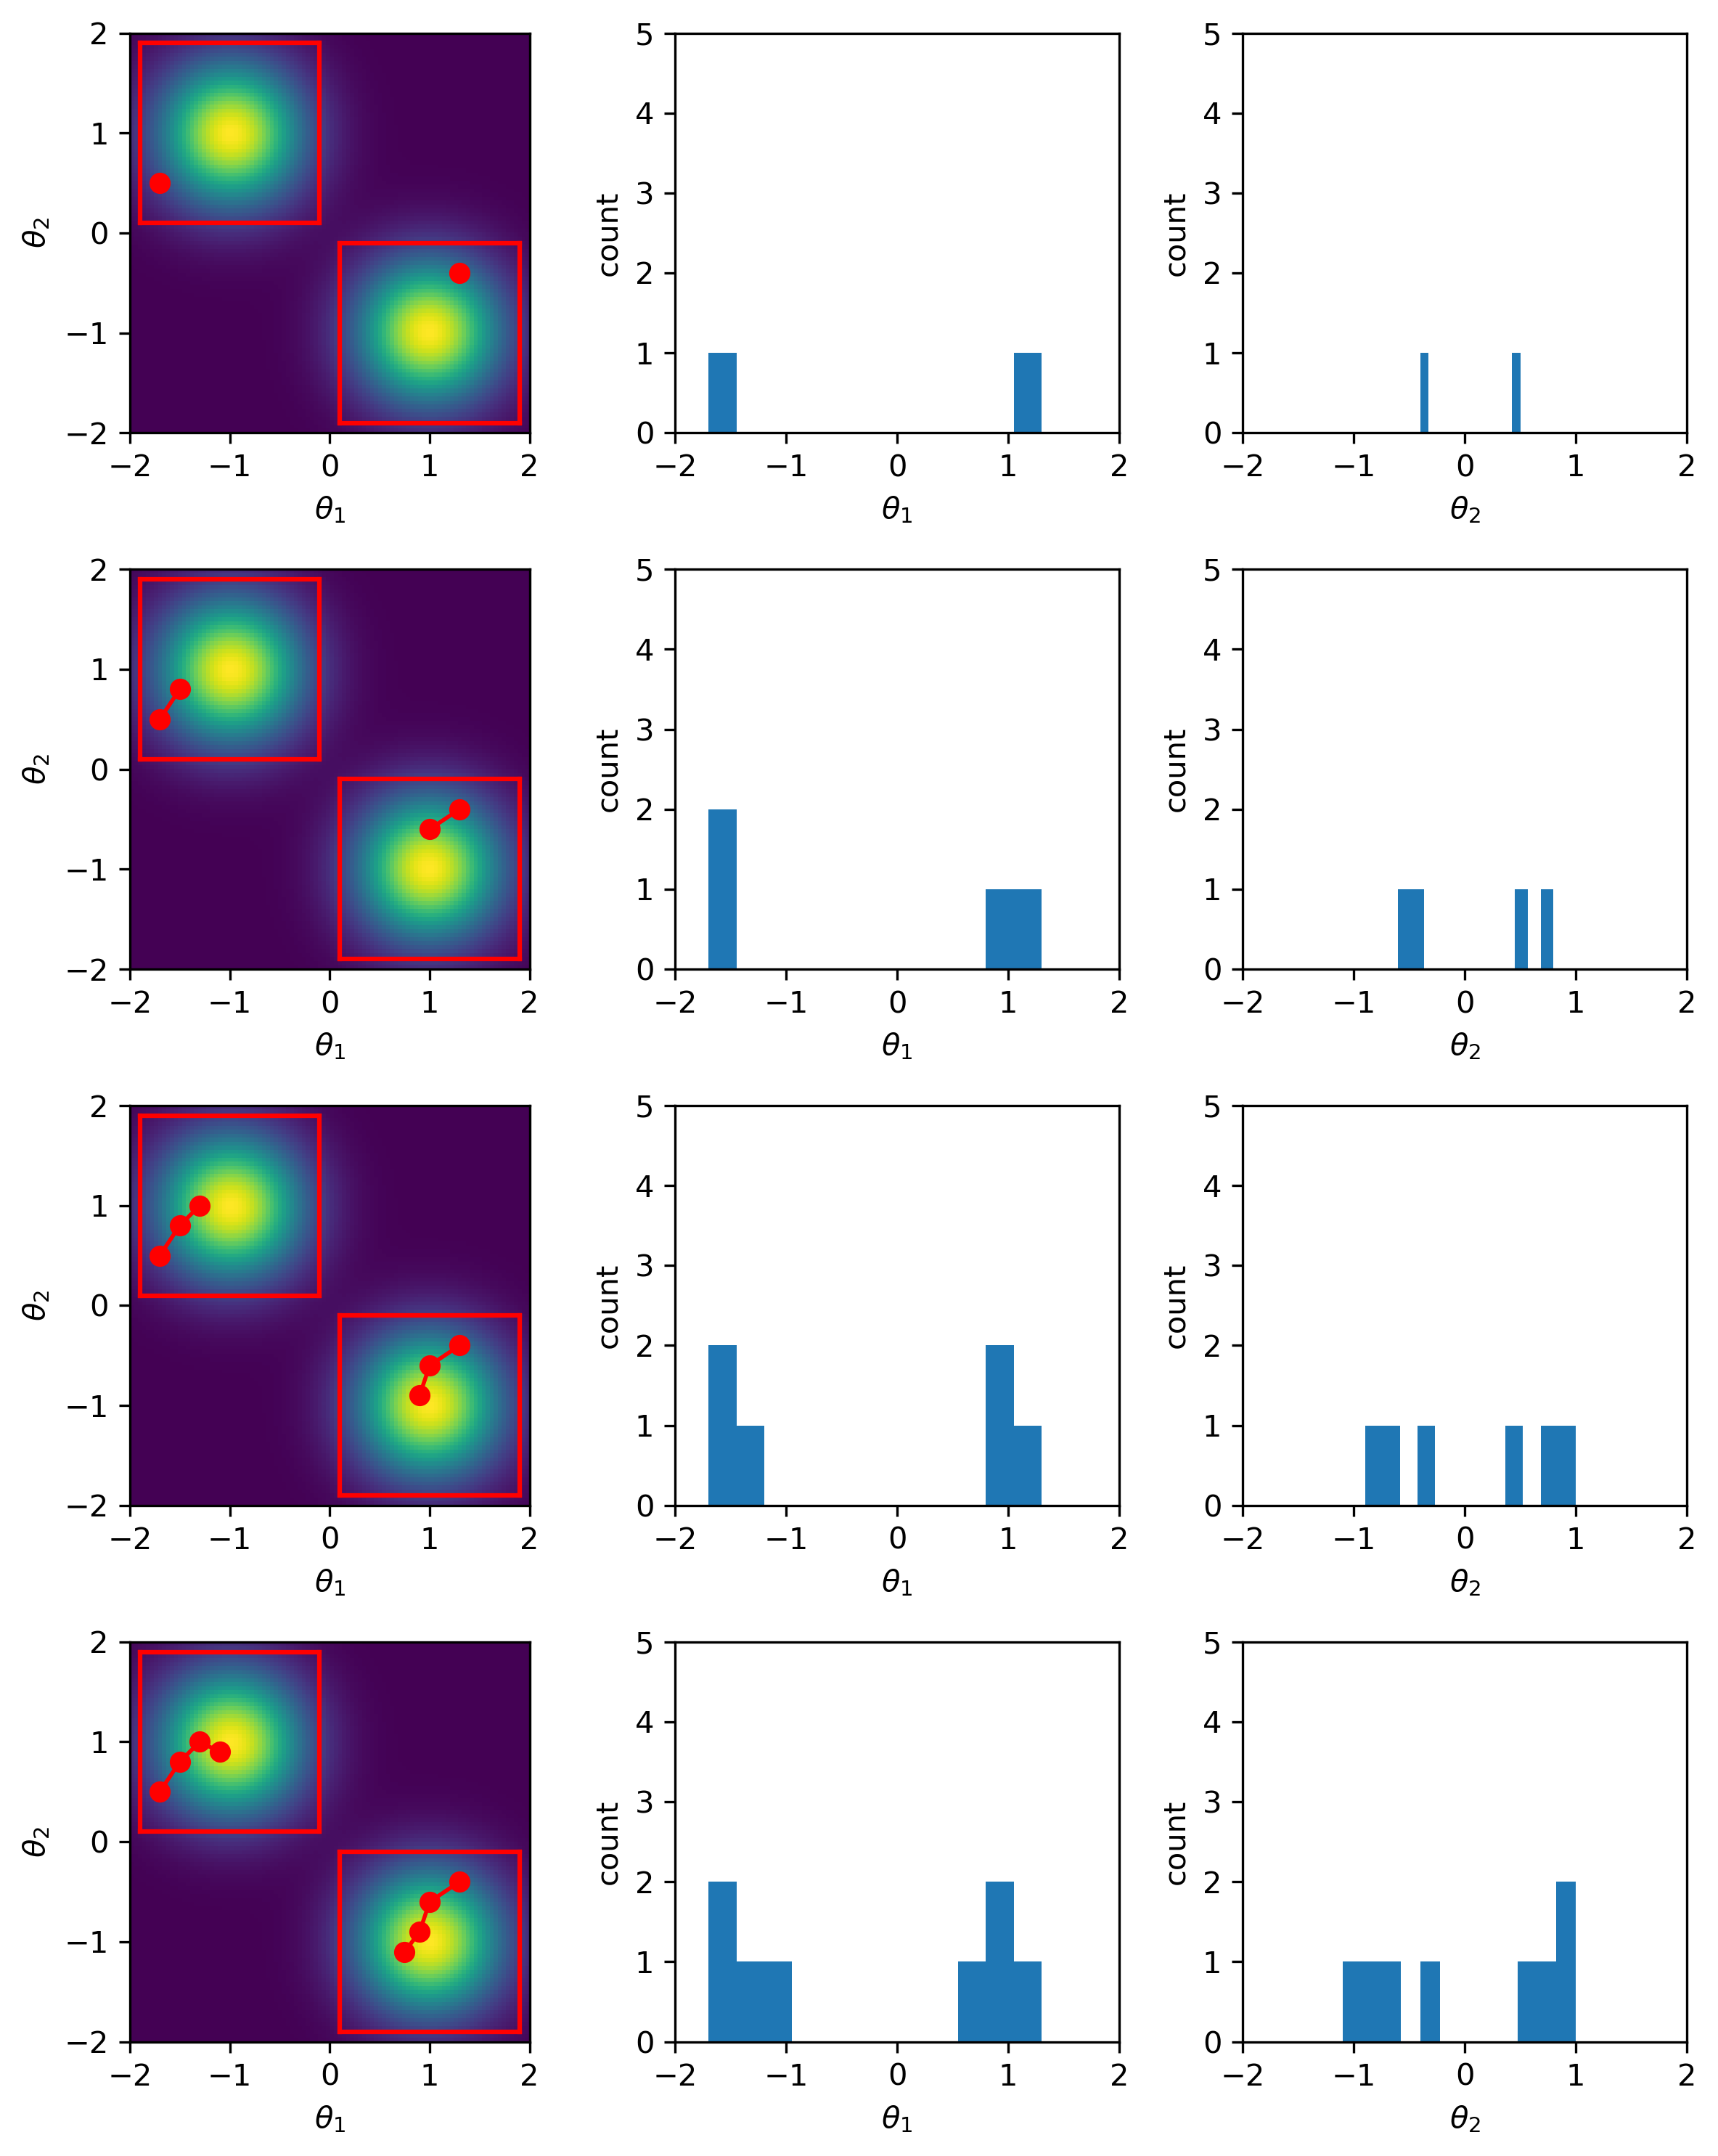

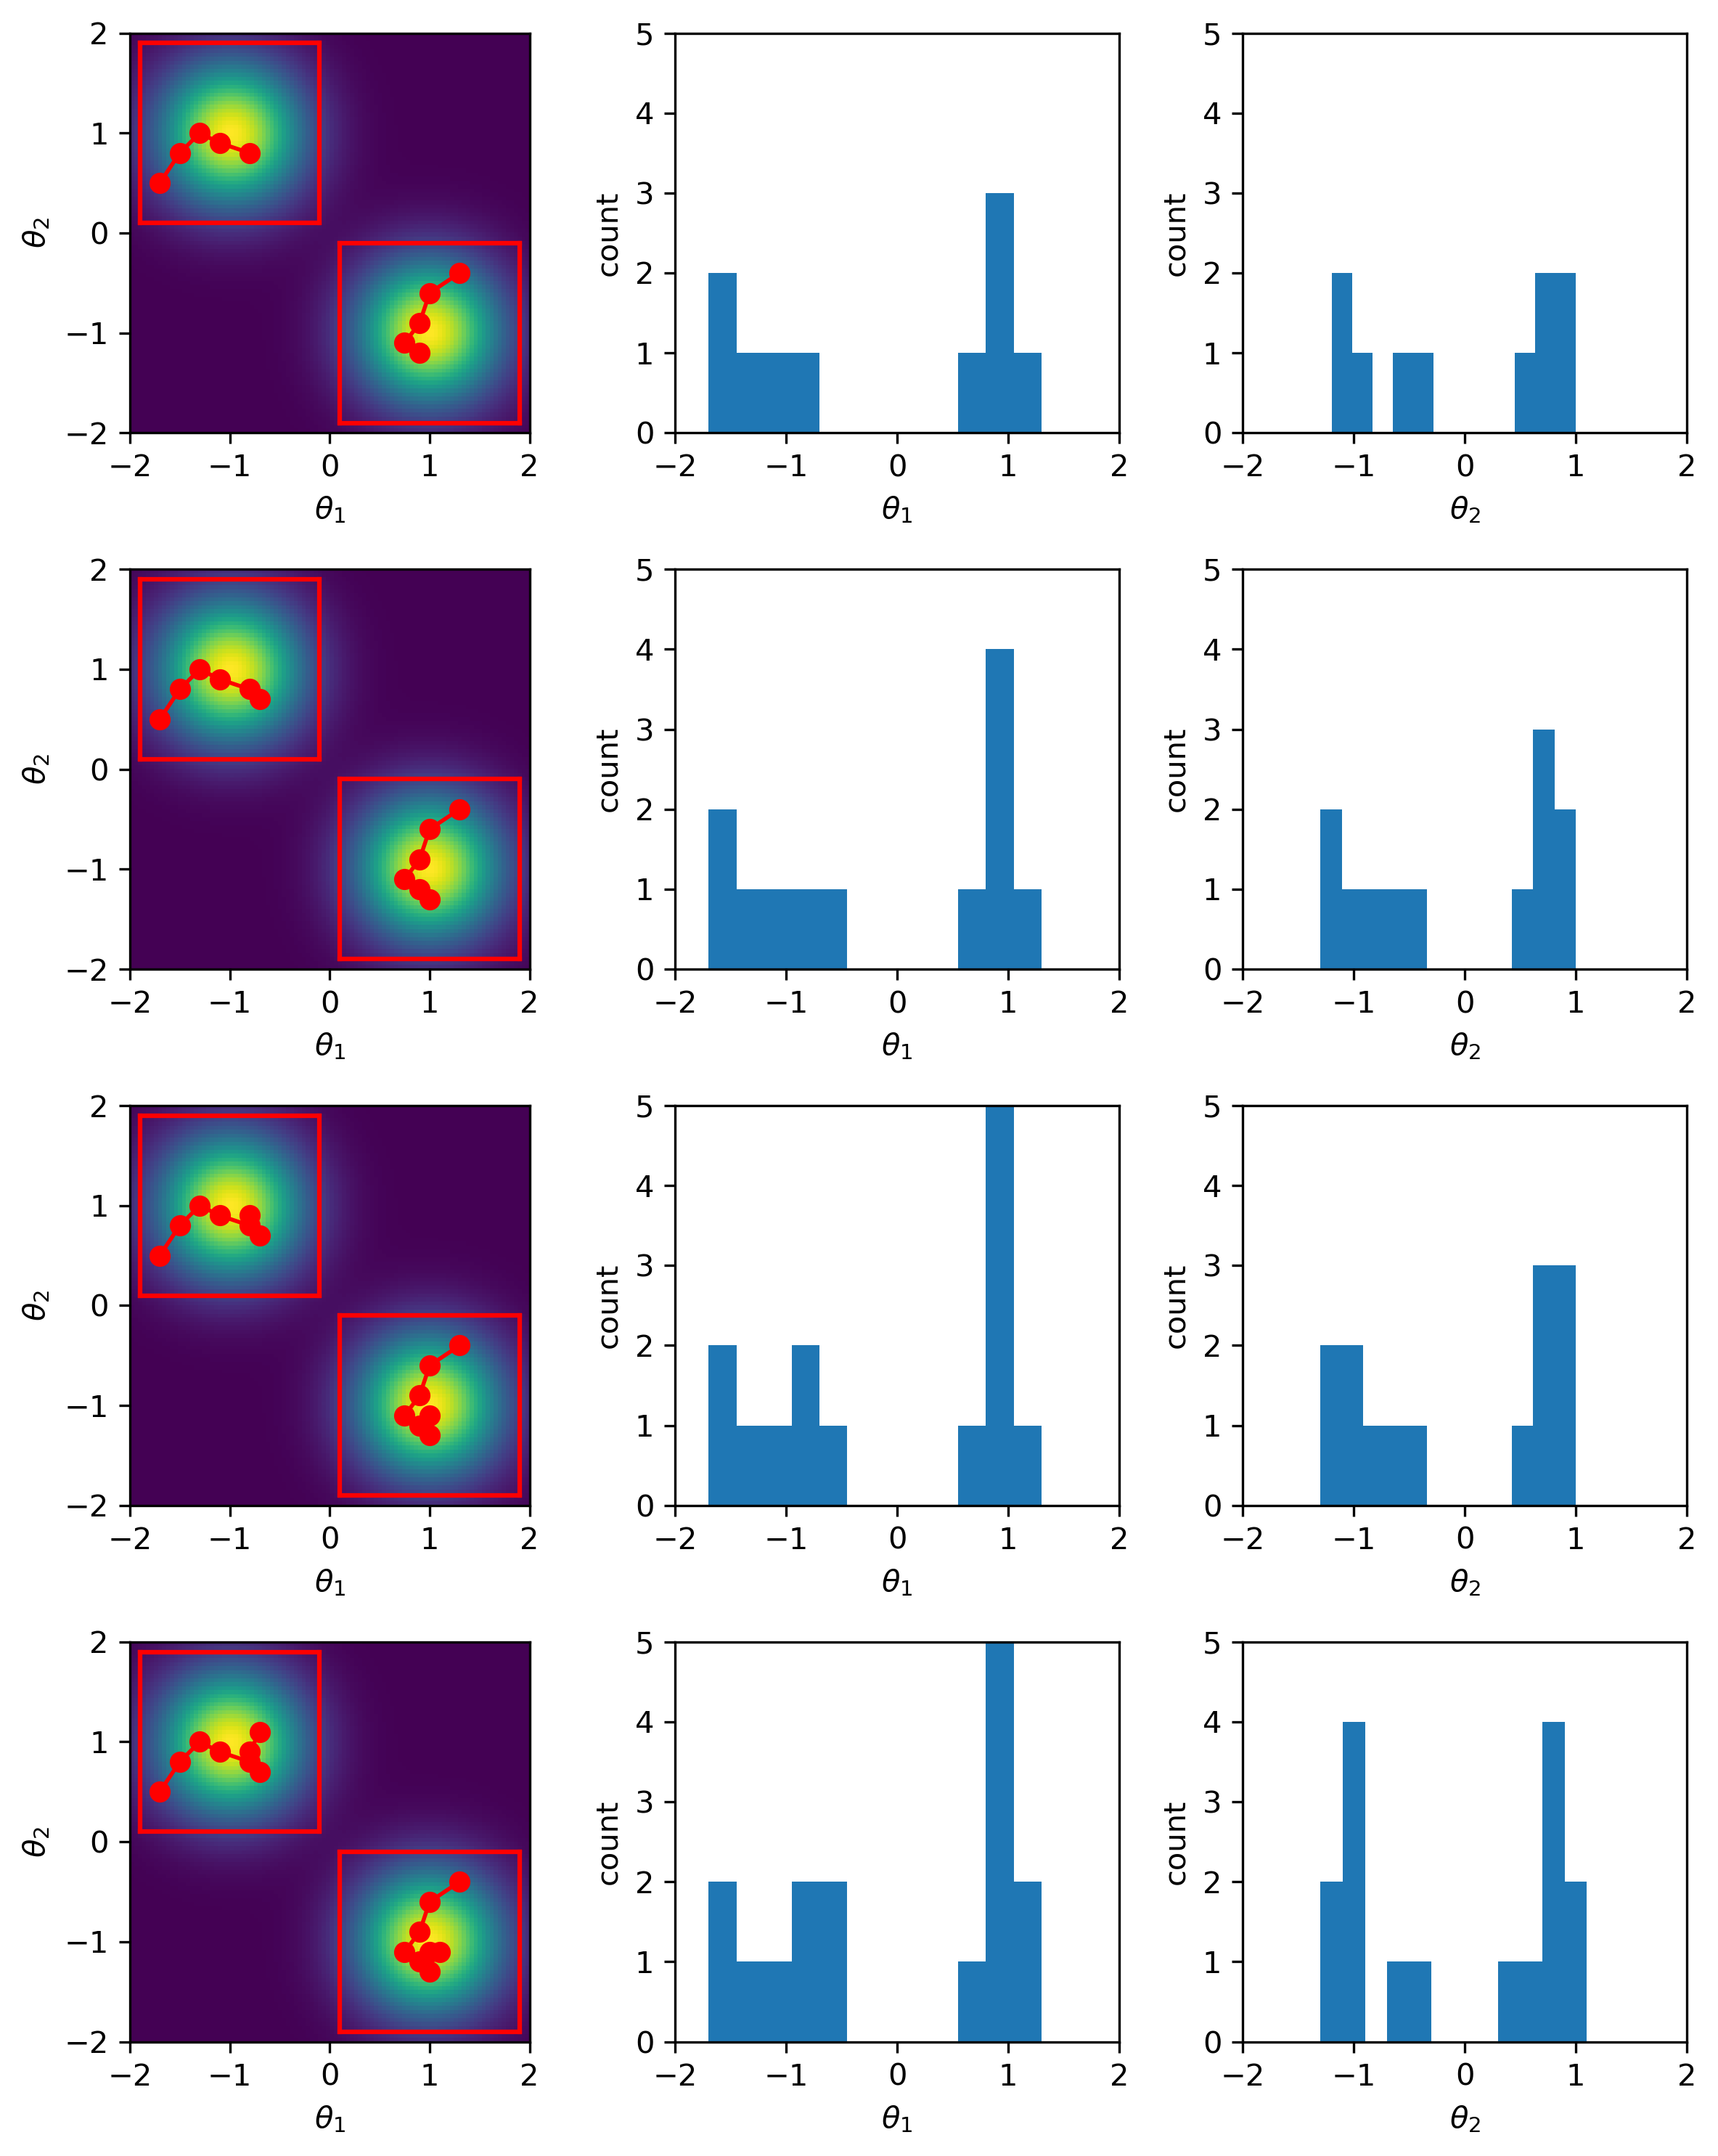

In [35]:
# plot points one by one, add a histogram as second plot

for i in range(0, len(list_of_points_h1), 4):

    fig, ax = plt.subplots(4, 3, figsize=(8, 10))

    for j in range(4):

        plot_heatmap_2(create_heatmap(), 
                       list_of_points_h1[:j+i+1], 
                       list_of_points_h2[:j+i+1],
                       ax[j][0])
        
        # plot a two histograms for both parameters
        # adjust the size of the figure
        # concatenate both lists of points
        list_of_points = list_of_points_h1[:j+i+1] + list_of_points_h2[:j+i+1]
        
        ax[j,1].hist([point[0] for point in list_of_points], bins=n_bins)
        # rename x and y labels
        ax[j,1].set_xlabel(r'$\theta_1$')
        ax[j,1].set_ylabel('count')
        ax[j,1].set_xlim(-2, 2)
        ax[j,1].set_ylim(0, 5)
        
        ax[j,2].hist([point[1] for point in list_of_points], bins=n_bins)
        # rename x and y labels
        ax[j,2].set_xlabel(r'$\theta_2$')
        ax[j,2].set_ylabel('count')
        ax[j,2].set_xlim(-2, 2)
        ax[j,2].set_ylim(0, 5)
        
    plt.tight_layout()
    
    fig.savefig('algo_hist_step_' + str(i) + '.eps', dpi = 300, format='eps')
    plt.show()
    